Mean Percentage Variance: -6.267069740512321


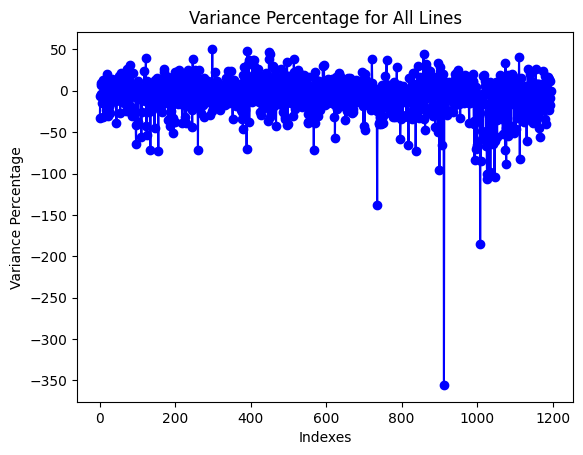

,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url,City
912,"Solgårdsvej 2, st. 2",55.82098,12.573817,350000,0,16,21875,5,https://www.dingeo.dk/adresse/2942-skodsborg/s...,2942


In [1]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the saved model
model = joblib.load('RFG_Model')

# Load the data
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df["City"] = int(city)
    dataframes.append(df)

data = pd.concat(dataframes, ignore_index=True)
data.dropna(inplace=True)

# Select relevant features
features = ['X', 'Y', 'Size', 'Type', 'Energy class', 'City']

# Prepare new data for prediction
new_house_data = pd.DataFrame([[56.034845, 12.591295, 68, 'Ejerlejlighed', 'D', 3000]], columns=features)


# Select relevant features
features = ['X', 'Y', 'Size', 'Type', 'Energy class', 'City']
target = 'Price'

# Preprocess the data
label_encoders = {}
for feature in features:
    if data[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        data[feature] = label_encoders[feature].fit_transform(data[feature])



# Apply label encoding to the new house data 
new_house = pd.DataFrame([[56.034845, 12.591295, 68, 'Ejerlejlighed', 'D', 3000]], columns=features)
for feature in features:
    if new_house[feature].dtype == 'object':
        new_house[feature] = label_encoders[feature].transform(new_house[feature])


predicted_prices = []
df_results = pd.DataFrame(columns=['Predicted Price', 'Original Price', 'Variance'])

for idx, row in data.iterrows():
    linenumber = idx 

    new_house = {
        'X': data.loc[linenumber, 'X'],
        'Y': data.loc[linenumber, 'Y'],
        'Size': data.loc[linenumber, 'Size'],
        'Type':data.loc[linenumber,'Type'],
        'Energy class':data.loc[linenumber, 'Size'],
        'City': data.loc[linenumber, 'City'],
    }

    original_price = data.loc[linenumber, 'Price']
    # Create a new DataFrame with the new data
    new_df = pd.DataFrame([new_house])

    # Make the prediction
    prediction = int(model.predict(new_df))

     # Calculate the variance
    variance = original_price - prediction

    variance_percent = (variance / original_price) * 100

    # Create a temporary DataFrame with the current iteration's results
    temp_df = pd.DataFrame({'Predicted Price': [prediction],
                            'Original Price': [original_price],
                            'Variance': [variance],
                            'Variance %': [variance_percent]})
    # Concatenate the temporary DataFrame with the df_results DataFrame
    df_results = pd.concat([df_results, temp_df], ignore_index=True)

    predicted_prices.append(prediction)



mean_variance_percent = df_results['Variance %'].mean()

# Print the mean percentage variance
print("Mean Percentage Variance:", mean_variance_percent)


variance_percent = df_results['Variance %']

# Set a threshold for the variance percentage above/below which rows will be considered as high variance
variance_threshold = 300  # Adjust the threshold as per your requirement

# Create a new DataFrame to store rows with high variance
high_variance_df = df_results[(df_results['Variance %'] >= variance_threshold) | (df_results['Variance %'] <= -variance_threshold)]

# Reset the index of the new DataFrame
high_variance_df = high_variance_df.reset_index(drop=True)

# Save the high variance DataFrame 
high_variance_df

# Create an array of line numbers
line_numbers = range(len(variance_percent))

# Create the line plot
plt.plot(line_numbers, variance_percent, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Indexes')
plt.ylabel('Variance Percentage')
plt.title('Variance Percentage for All Lines')

# Show the plot
plt.show()

data[data["Price"] == 350000]
